** Combining Naive Bayes, SVM and KNN ** 

In [12]:
%matplotlib inline
%run 'TrainingData.ipynb'
%run 'TestData.ipynb'
%run 'DisplayHelpers.ipynb'

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise as smp
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.cross_validation import KFold
from scipy.sparse import lil_matrix

myappdata = TrainingData()

N Fold Precision = 1.0 Recall 1.0 Fscore 1.0
Overall Precision = 1.0 Recall 1.0 fscore 1.0


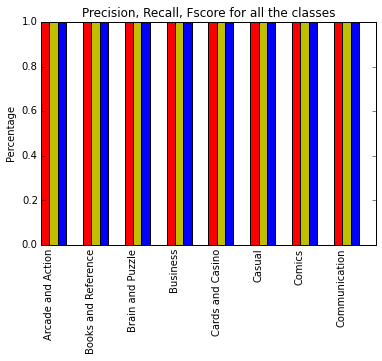

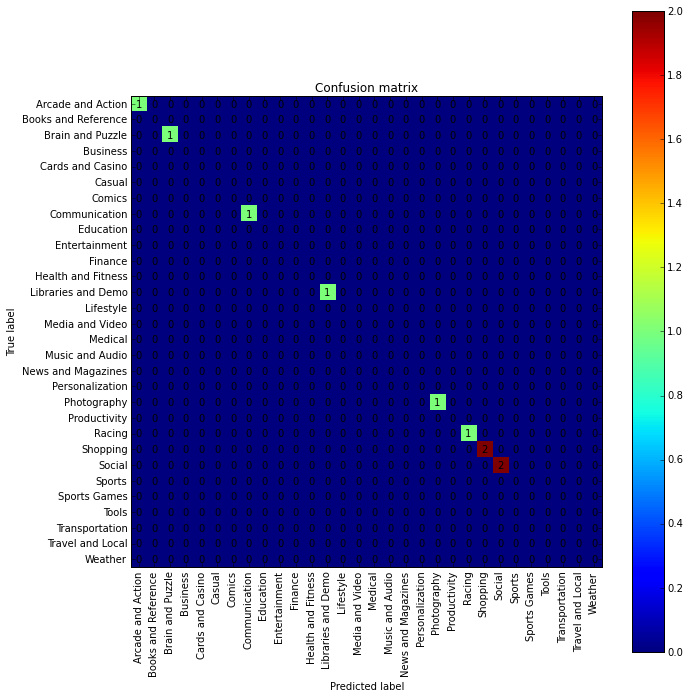

In [17]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import linear_model
from sklearn.decomposition import TruncatedSVD

results = []

(train_data, train_labels) = myappdata.get_all_data_and_labels()
(test_data, test_labels) = TestData.load_from_file()

# clf = MultinomialNB()
# predict_labels_arr1 = clf.fit(train_data, train_labels).predict(test_data)

clf = svm.LinearSVC()
clf.fit(train_data, train_labels)
predict_labels_arr = clf.predict(test_data)

# svd = TruncatedSVD(n_components=200, random_state=42)
# reduced_train_data = svd.fit_transform(train_data)
# clf = KNeighborsClassifier(n_neighbors=14) 
# clf.fit(reduced_train_data, train_labels)
# reduced_test_data = svd.transform(test_data)
# predict_labels_arr3 = clf.predict(reduced_test_data)

# predict_labels_arr = []
# for elem in zip(predict_labels_arr1,predict_labels_arr2,predict_labels_arr3):
#     if (elem[0] == elem[1]) or (elem[0] == elem[2]):
#         predict_labels_arr.append(elem[0])
#     elif (elem[1] == elem[2]):
#         predict_labels_arr.append(elem[1])
#     else:
#         predict_labels_arr.append(elem[1])

(precision, recall, fscore, support) = precision_recall_fscore_support(test_labels, predict_labels_arr)

results.append((precision, recall, fscore))
cm = confusion_matrix(test_labels, predict_labels_arr, myappdata.total_sorted_app_labels)

print("N Fold Precision = {0} Recall {1} Fscore {2}".format(sum(precision)/precision.size, 
                                                            sum(recall)/recall.size,
                                                            sum(fscore)/fscore.size))

average_precision =  [sum(elem)/len(elem) for elem in zip(*[x[0] for x in results])]
average_recall = [sum(elem)/len(elem) for elem in zip(*[x[1] for x in results])]
average_fscore = [sum(elem)/len(elem) for elem in zip(*[x[2] for x in results])]

print("Overall Precision = {0} Recall {1} fscore {2}".format(sum(average_precision)/len(average_precision), 
                                                  sum(average_recall)/len(average_recall),
                                                    sum(average_fscore)/len(average_fscore)))

plot_precision_and_recall(average_precision, average_recall, average_fscore, myappdata.total_sorted_app_labels)
plot_confusion_matrix(cm, myappdata.total_sorted_app_labels)